In [37]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.base.datetools import dates_from_str
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from openpyxl import load_workbook
import seaborn as sns

In [38]:
#Here is how you pass through the API key to read in FRED data
#You can get your own API here (require free sign-up): https://research.stlouisfed.org/docs/api/api_key.html

from fredapi import Fred
fred = Fred(api_key='605b6e87e8567f8473829d7780c0192c')

In [39]:
#ALWAYS use Arial fonts
matplotlib.rcParams['font.family'] = "Arial"

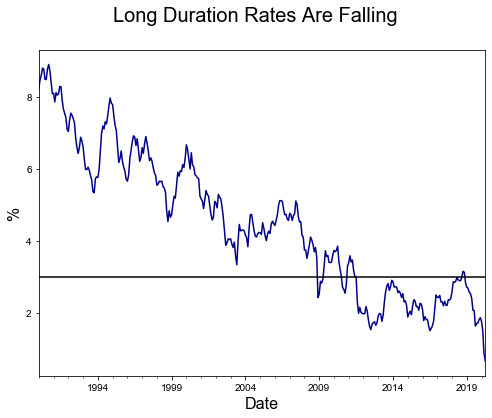

In [40]:
#Example of how FRED plugin works

ten_year = fred.get_series("GS10", observation_start='1990-01-01')
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates Are Falling', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(3.0, color="black")

In [41]:
#Pulling multiple series at once for per capita income.

personal_income_series = fred.search_by_release(175, limit=25, order_by='popularity', sort_order='desc')
personal_income_series['title']

series id
PCPI06037      Per Capita Personal Income in Los Angeles Coun...
SEAT653PCPI    Per Capita Personal Income in Seattle-Tacoma-B...
PCPI06075      Per Capita Personal Income in San Francisco Co...
CHIC917PCPI    Per Capita Personal Income in Chicago-Napervil...
PCPI12086      Per Capita Personal Income in Miami-Dade Count...
PCPI36061      Per Capita Personal Income in New York County, NY
DALL148PCPI    Per Capita Personal Income in Dallas-Fort Wort...
SANF806PCPI    Per Capita Personal Income in San Francisco-Oa...
DETR826PCPI    Per Capita Personal Income in Detroit-Warren-D...
ANNA426PCPI    Per Capita Personal Income in Ann Arbor, MI (MSA)
PORT941PCPI    Per Capita Personal Income in Portland-Vancouv...
BOST625PCPI    Per Capita Personal Income in Boston-Cambridge...
ATLA013PCPI    Per Capita Personal Income in Atlanta-Sandy Sp...
PCPI06059        Per Capita Personal Income in Orange County, CA
SANJ906PCPI    Per Capita Personal Income in San Jose-Sunnyva...
WASH911PCPI    

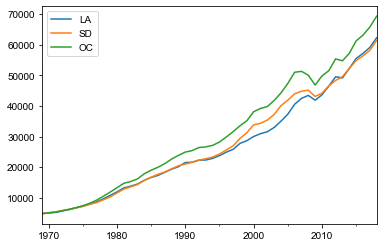

In [42]:
df = {}
df['LA'] = fred.get_series('PCPI06037')
df['SD'] = fred.get_series('PCPI06073')
df['OC'] = fred.get_series('PCPI06059')
df = pd.DataFrame(df)
df.plot()

In [43]:
#Now let's do it for retail sales

retail_sales_series = fred.search_by_release(9, order_by='popularity', sort_order='desc')
retail_sales_series['title']

series id
RSXFS                 Advance Retail Sales: Retail (Excluding Food S...
RSAFS                 Advance Retail Sales: Retail and Food Services...
RSCCAS                Advance Retail Sales: Clothing and Clothing Ac...
RSFSDP                Advance Retail Sales: Food Services and Drinki...
RSFHFS                Advance Retail Sales: Furniture and Home Furni...
                                            ...                        
MARTSMPCSM453USS      Advance Retail Sales: Miscellaneous Store Reta...
MARTSMPCSM44Z72USS    Advance Retail Sales: Retail Trade and Food Se...
MARTSMPCSM453USN      Advance Retail Sales: Miscellaneous Store Reta...
MARTSMPCSM44Z72USN    Advance Retail Sales: Retail Trade and Food Se...
MARTSMPCSM452USN       Advance Retail Sales: General Merchandise Stores
Name: title, Length: 86, dtype: object

In [53]:
retail_sales_series.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
RSXFS,RSXFS,2020-05-05,2020-05-05,Advance Retail Sales: Retail (Excluding Food S...,1992-01-01,2020-03-01,Monthly,M,Millions of Dollars,Mil. of $,Seasonally Adjusted,SA,2020-04-15 07:41:02-05:00,66,E-commerce sales are included in the total mon...
RSAFS,RSAFS,2020-05-05,2020-05-05,Advance Retail Sales: Retail and Food Services...,1992-01-01,2020-03-01,Monthly,M,Millions of Dollars,Mil. of $,Seasonally Adjusted,SA,2020-04-15 07:41:08-05:00,63,The value for the most recent month is an adva...
RSCCAS,RSCCAS,2020-05-05,2020-05-05,Advance Retail Sales: Clothing and Clothing Ac...,1992-01-01,2020-03-01,Monthly,M,Millions of Dollars,Mil. of $,Seasonally Adjusted,SA,2020-04-15 07:41:14-05:00,45,The value for the most recent month is an adva...
RSFSDP,RSFSDP,2020-05-05,2020-05-05,Advance Retail Sales: Food Services and Drinki...,1992-01-01,2020-03-01,Monthly,M,Millions of Dollars,Mil. of $,Seasonally Adjusted,SA,2020-04-15 07:41:14-05:00,41,The value for the most recent month is an adva...
RSFHFS,RSFHFS,2020-05-05,2020-05-05,Advance Retail Sales: Furniture and Home Furni...,1992-01-01,2020-03-01,Monthly,M,Millions of Dollars,Mil. of $,Seasonally Adjusted,SA,2020-04-15 07:41:17-05:00,38,The value for the most recent month is an adva...


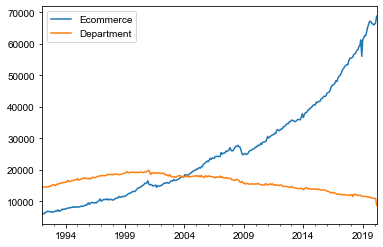

In [54]:
df = {}
df['Grocery'] = fred.get_series('RSGCS')
df['Department'] = fred.get_series('RSDSELD')
df['Ecommerce'] = fred.get_series('RSNSR')
df['F&B'] = fred.get_series('RSFSDP')
df['Apparel'] = fred.get_series('RSCCAS')
df['Home Goods'] = fred.get_series('RSFHFS')
df['Variety'] = fred.get_series('RSGMS')
df['Drug Stores'] = fred.get_series('RSHPCS')
df['Sporting Goods'] = fred.get_series('RSSGHBMS')
df['Gas Stations'] = fred.get_series('RSGASS')
df['Electronics'] = fred.get_series('RSEAS')
df['Home Improvement'] = fred.get_series('RSBMGESD')
df['Miscellaneous'] = fred.get_series('RSMSR')

#Can also do this as YOY change
dfa = {}
dfa['Grocery'] = (fred.get_series('RSGCS').pct_change(periods=12))*100
dfa['Department'] = (fred.get_series('RSDSELD').pct_change(periods=12))*100
dfa['Ecommerce'] = (fred.get_series('RSNSR').pct_change(periods=12))*100
dfa['F&B'] = (fred.get_series('RSFSDP').pct_change(periods=12))*100
dfa['Apparel'] = (fred.get_series('RSCCAS').pct_change(periods=12))*100
dfa['Home Goods'] = (fred.get_series('RSFHFS').pct_change(periods=12))*100
dfa['Variety'] = (fred.get_series('RSGMS').pct_change(periods=12))*100
dfa['Drug Stores'] = (fred.get_series('RSHPCS').pct_change(periods=12))*100
dfa['Sporting Goods'] = (fred.get_series('RSSGHBMS').pct_change(periods=12))*100
dfa['Gas Stations'] = (fred.get_series('RSGASS').pct_change(periods=12))*100
dfa['Electronics'] = (fred.get_series('RSEAS').pct_change(periods=12))*100
dfa['Home Improvement'] = (fred.get_series('RSBMGESD').pct_change(periods=12))*100
dfa['Miscellaneous'] = (fred.get_series('RSMSR').pct_change(periods=12))*100

# Or MOM...
dfm = {}
dfm['Grocery'] = (fred.get_series('RSGCS').pct_change(periods=1))*100
dfm['Department'] = (fred.get_series('RSDSELD').pct_change(periods=1))*100
dfm['Ecommerce'] = (fred.get_series('RSNSR').pct_change(periods=1))*100
dfm['F&B'] = (fred.get_series('RSFSDP').pct_change(periods=1))*100
dfm['Apparel'] = (fred.get_series('RSCCAS').pct_change(periods=1))*100
dfm['Home Goods'] = (fred.get_series('RSFHFS').pct_change(periods=1))*100
dfm['Variety'] = (fred.get_series('RSGMS').pct_change(periods=1))*100
dfm['Drug Stores'] = (fred.get_series('RSHPCS').pct_change(periods=1))*100
dfm['Sporting Goods'] = (fred.get_series('RSSGHBMS').pct_change(periods=1))*100
dfm['Gas Stations'] = (fred.get_series('RSGASS').pct_change(periods=1))*100
dfm['Electronics'] = (fred.get_series('RSEAS').pct_change(periods=1))*100
dfm['Home Improvement'] = (fred.get_series('RSBMGESD').pct_change(periods=1))*100
dfm['Miscellaneous'] = (fred.get_series('RSMSR').pct_change(periods=1))*100

df = pd.DataFrame(df)
dfa = pd.DataFrame(dfa)
dfm = pd.DataFrame(dfm)
df[['Ecommerce','Department']].plot()

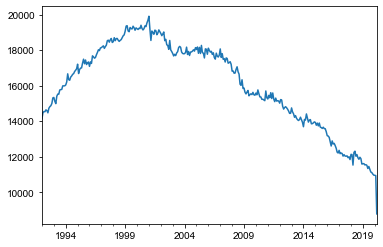

In [55]:
df['Department'].plot()

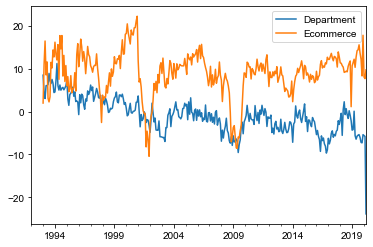

In [56]:
dfa[['Department', 'Ecommerce']].plot()

In [57]:
df.drop(df.head(12).index,inplace=True)
dfa.drop(dfa.head(12).index,inplace=True)
dfm.drop(dfm.head(12).index,inplace=True)

In [58]:
dfm.head()

,Grocery,Department,Ecommerce,F&B,Apparel,Home Goods,Variety,Drug Stores,Sporting Goods,Gas Stations,Electronics,Home Improvement,Miscellaneous
1993-01-01,-0.046045,0.156760,0.712445,0.354468,2.548944,4.719964,-1.696396,-0.106298,-4.000000,-0.571429,3.460452,2.264934,5.791658
1993-02-01,0.705174,-1.402113,2.046960,-0.427277,-4.073339,-2.803537,0.042090,1.769088,-1.726974,1.477833,-1.183163,0.679432,-8.520179
1993-03-01,-0.394103,-0.886302,3.377581,0.434832,-2.305419,-0.976259,-0.556283,-0.601229,0.641562,-0.801706,0.921022,-1.980719,-1.736111
1993-04-01,0.211962,2.809476,-2.011699,1.230489,3.438887,2.263052,2.284586,1.025641,3.907982,0.385556,1.756788,2.083333,4.614425
1993-05-01,0.066979,0.759444,6.421083,0.287001,1.257678,1.709027,1.075417,-0.221268,-0.080021,-0.132949,0.560538,2.653937,-1.311345


In [59]:
writer = pd.ExcelWriter('S:/IPG/SP&A/Research/Python/FRED API Retail Sales/retail_sales_test.xlsx', engine='xlsxwriter')

df.to_excel(writer, sheet_name='Values')
dfa.to_excel(writer, sheet_name='YOY')
dfm.to_excel(writer, sheet_name='MOM')

writer.save()